# Week 3 Exercise
*Lai Wei Sheng. S/N:19107650*

# Using TensorFlow+Keras to train neural network on MNIST dateset

In [2]:
#importing usual modules
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure


#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

#importing image resolution
import matplotlib as mpl  
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['figure.dpi']=200 # dots per inch

## Import MNIST datasets

In [3]:
mnist = keras.datasets.mnist                                                  # The original handwritten digit MNIST

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # Importing datasets from MNIST

In [4]:
# Printing shape and size of images from datasets
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


### Rescaling images

It is known that each image pixels has a value ranging from 0-255. Thus we rescale each value to range from 0-1.

In [5]:
# Rescaling pixels of images
train_images=train_images/255.0
test_images=test_images/255.0

## Define function to add random noise

In [6]:
def mnist_noisy(images, y_noise):
    '''
    A function written to add random noise contribution drawn from a uniform distribution 
    from 0 to y_noise to each pixel of images
    
    Input:
    images = input image to be added with noise
    y_noise = configurable parameter for range of random noise
    
    Output:
    Image with random noises
    
    '''
    noisy_images = images + y_noise * np.random.rand(images.shape[0],images.shape[1],images.shape[2])
    return noisy_images

## Building Neural Network with Keras

### Set up the layers
A neural network is created using `Keras`.

The model consists of 3 layers:

1. First layer that flattens out the 28x28 pixel image into a 1-dimensional array of length 784 (28x28)
2. Second layer has 32 nodes with parameters and `reLu` as activation function.
3. Third layer is the output layer with 10 nodes to accomodate 10 possible outcomes

In [7]:
# Building a model neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # First layer
    keras.layers.Dense(32,activation='relu'),     # Second layer
    keras.layers.Dense(10)                        # Third layer
])

### Compiled model

Using the SparseCategoricalCrossentropy as loss function and `adam` as an optimzer with the metrics set to be `accuracy` to monitor training and testing steps.

In [8]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

## Training neural network without any noise

Using the `model.fit` function and **train_images** without any noise, the model is traind with batch size of 100 and 10 epochs.

In [9]:
history=model.fit(train_images, train_labels,batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4692 - accuracy: 0.8731
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2463 - accuracy: 0.9311
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2010 - accuracy: 0.9431
Epoch 4/10
600/600 [==============================] - 1s 926us/step - loss: 0.1718 - accuracy: 0.9516
Epoch 5/10
600/600 [==============================] - 1s 914us/step - loss: 0.1515 - accuracy: 0.9567
Epoch 6/10
600/600 [==============================] - 1s 911us/step - loss: 0.1354 - accuracy: 0.9608
Epoch 7/10
600/600 [==============================] - 1s 907us/step - loss: 0.1227 - accuracy: 0.9641
Epoch 8/10
600/600 [==============================] - 1s 919us/step - loss: 0.1130 - accuracy: 0.9673
Epoch 9/10
600/600 [==============================] - 1s 942us/step - loss: 0.1045 - accuracy: 0.9702
Epoch 10/10
600/600 [==============================] - 1s 929us/step - loss: 0.0984 - ac

### Testing accuracy of neural network with test images

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.1220 - accuracy: 0.9634


An accuracy of 96.34% (> 95%) is obtained which is an acceptable performance.

## Accuracy test with test images of different noise.

Without retraining the model, it is then compared to test images with different value of **y_noise** added.

A graph of **test accuracy** vs **test noise** is then plotted.

Text(0.5, 1.0, 'Plot of Test Accuracy against Test Noise')

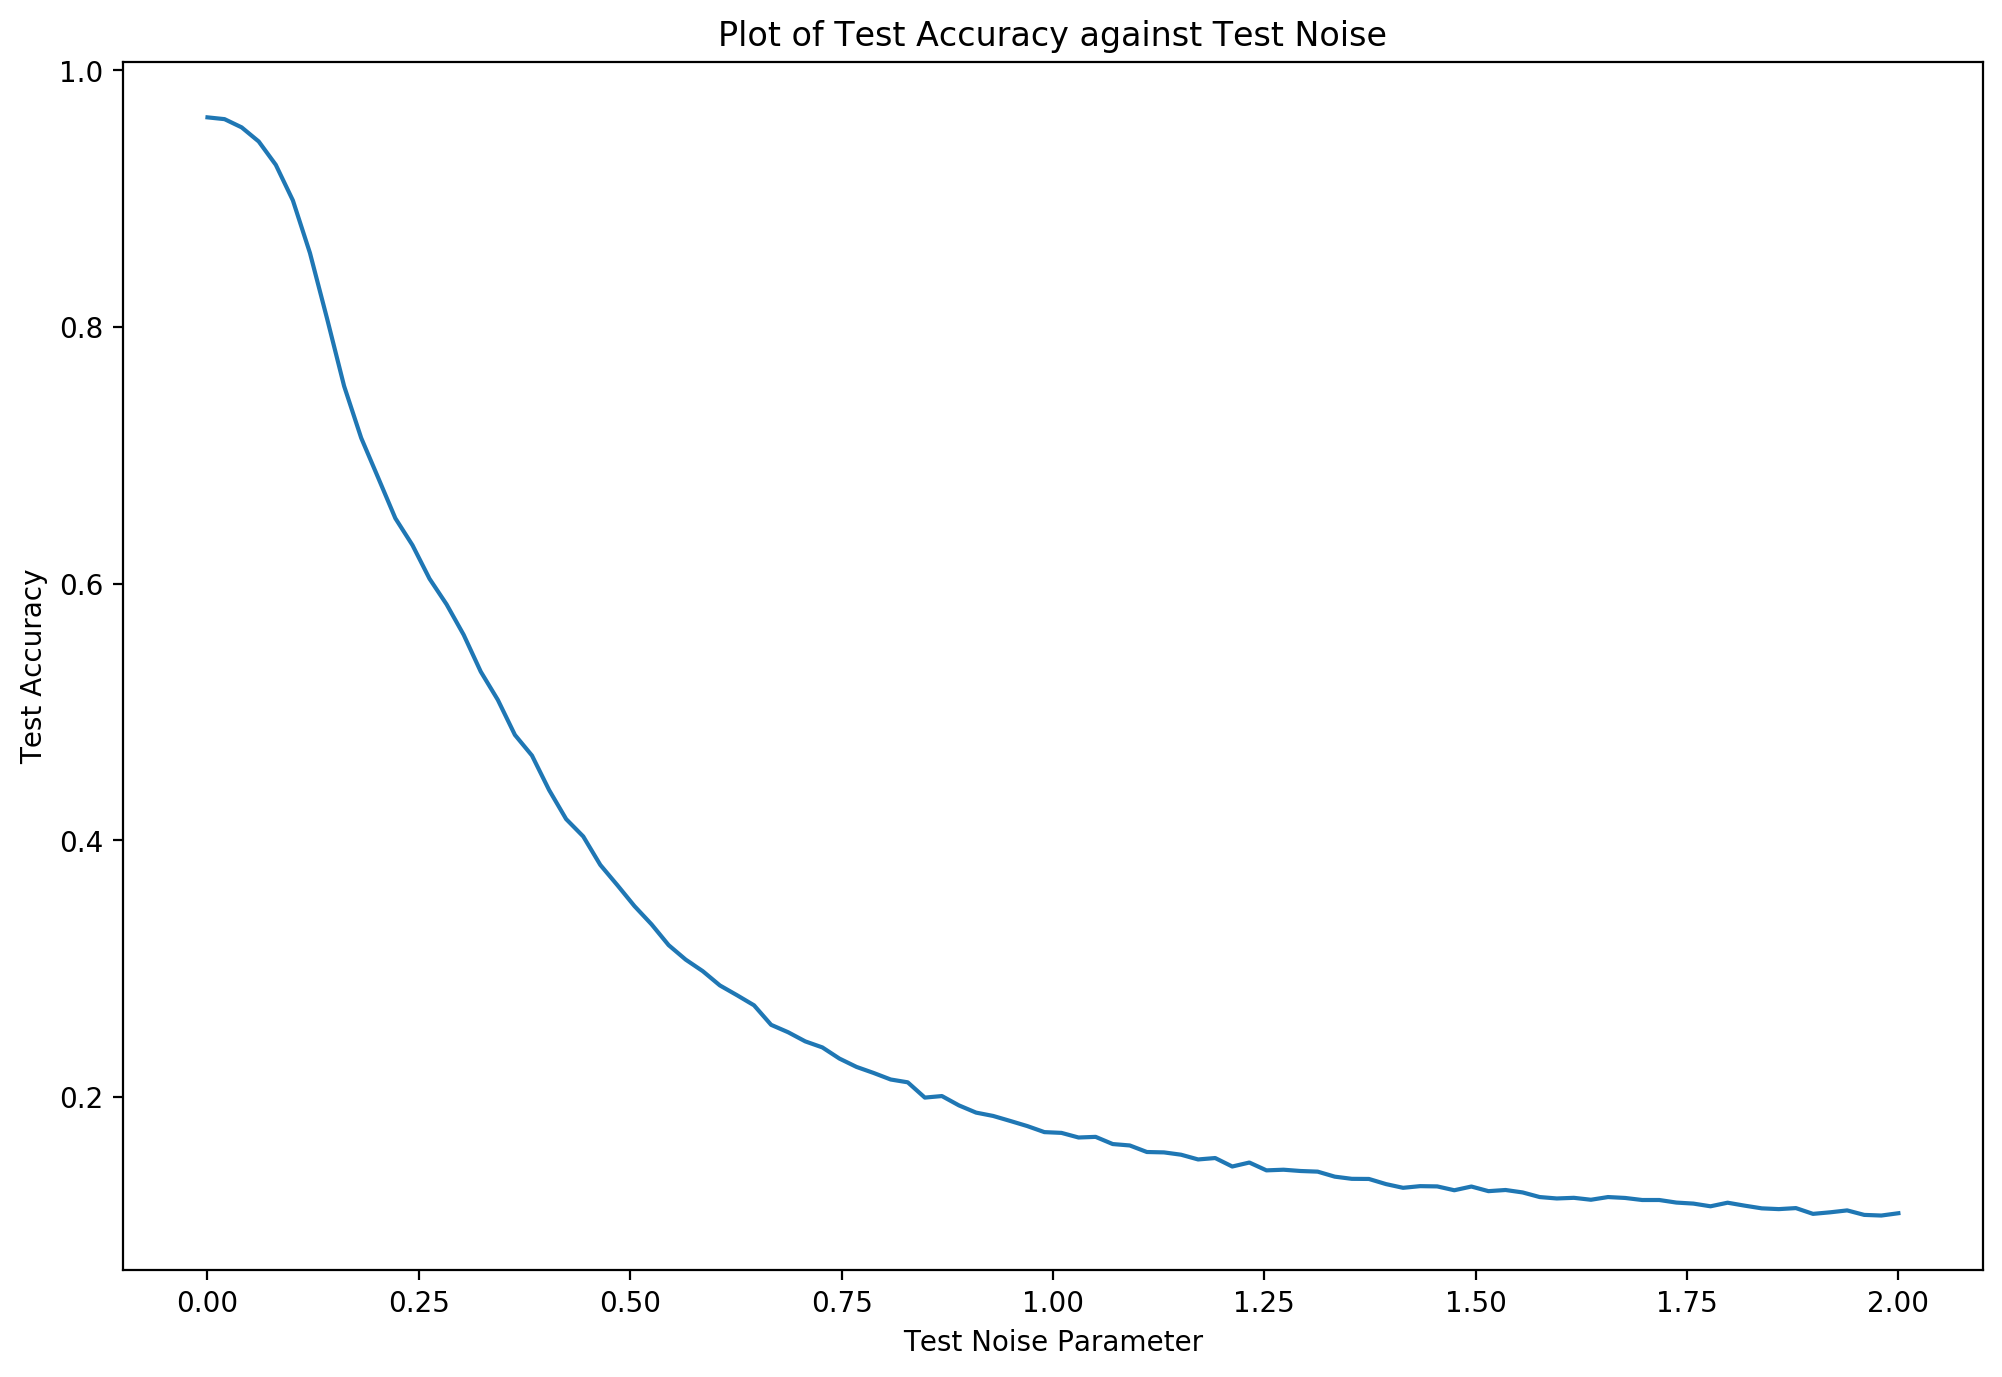

In [11]:
# Creating array
y_noise = np.linspace(0,2,100)              # Create array for differeny y_noise
test_accuracy = np.zeros(len(y_noise))      # Create an empty array for test accuracy

# Loop for finding different test accuracy
for i in range (len(y_noise)):
    
    test_images_noisy = mnist_noisy(test_images,y_noise[i])                          # Create test image with noise
    test_loss, test_acc = model.evaluate(test_images_noisy,  test_labels, verbose=0) # Evaluating model
    test_accuracy[i] = test_acc                                                      # Append test accuracy value

    
# Plot
plt.figure()
plt.plot(y_noise, test_accuracy)                        # Plot
plt.xlabel("Test Noise Parameter")                      # Label x-axes
plt.ylabel("Test Accuracy")                             # Label y-axes
plt.title("Plot of Test Accuracy against Test Noise")   # Plot title
    

## Adding noise to train images and compared to test images with different noise

We will be training the model using train images with different **y_noise** added (eg:0, 0.2, 0.4, ..... 1.6, 1.8, 2.0). Then an accuracy test is done with test images of different**y_noise**.


To do so a `for loop` is used.

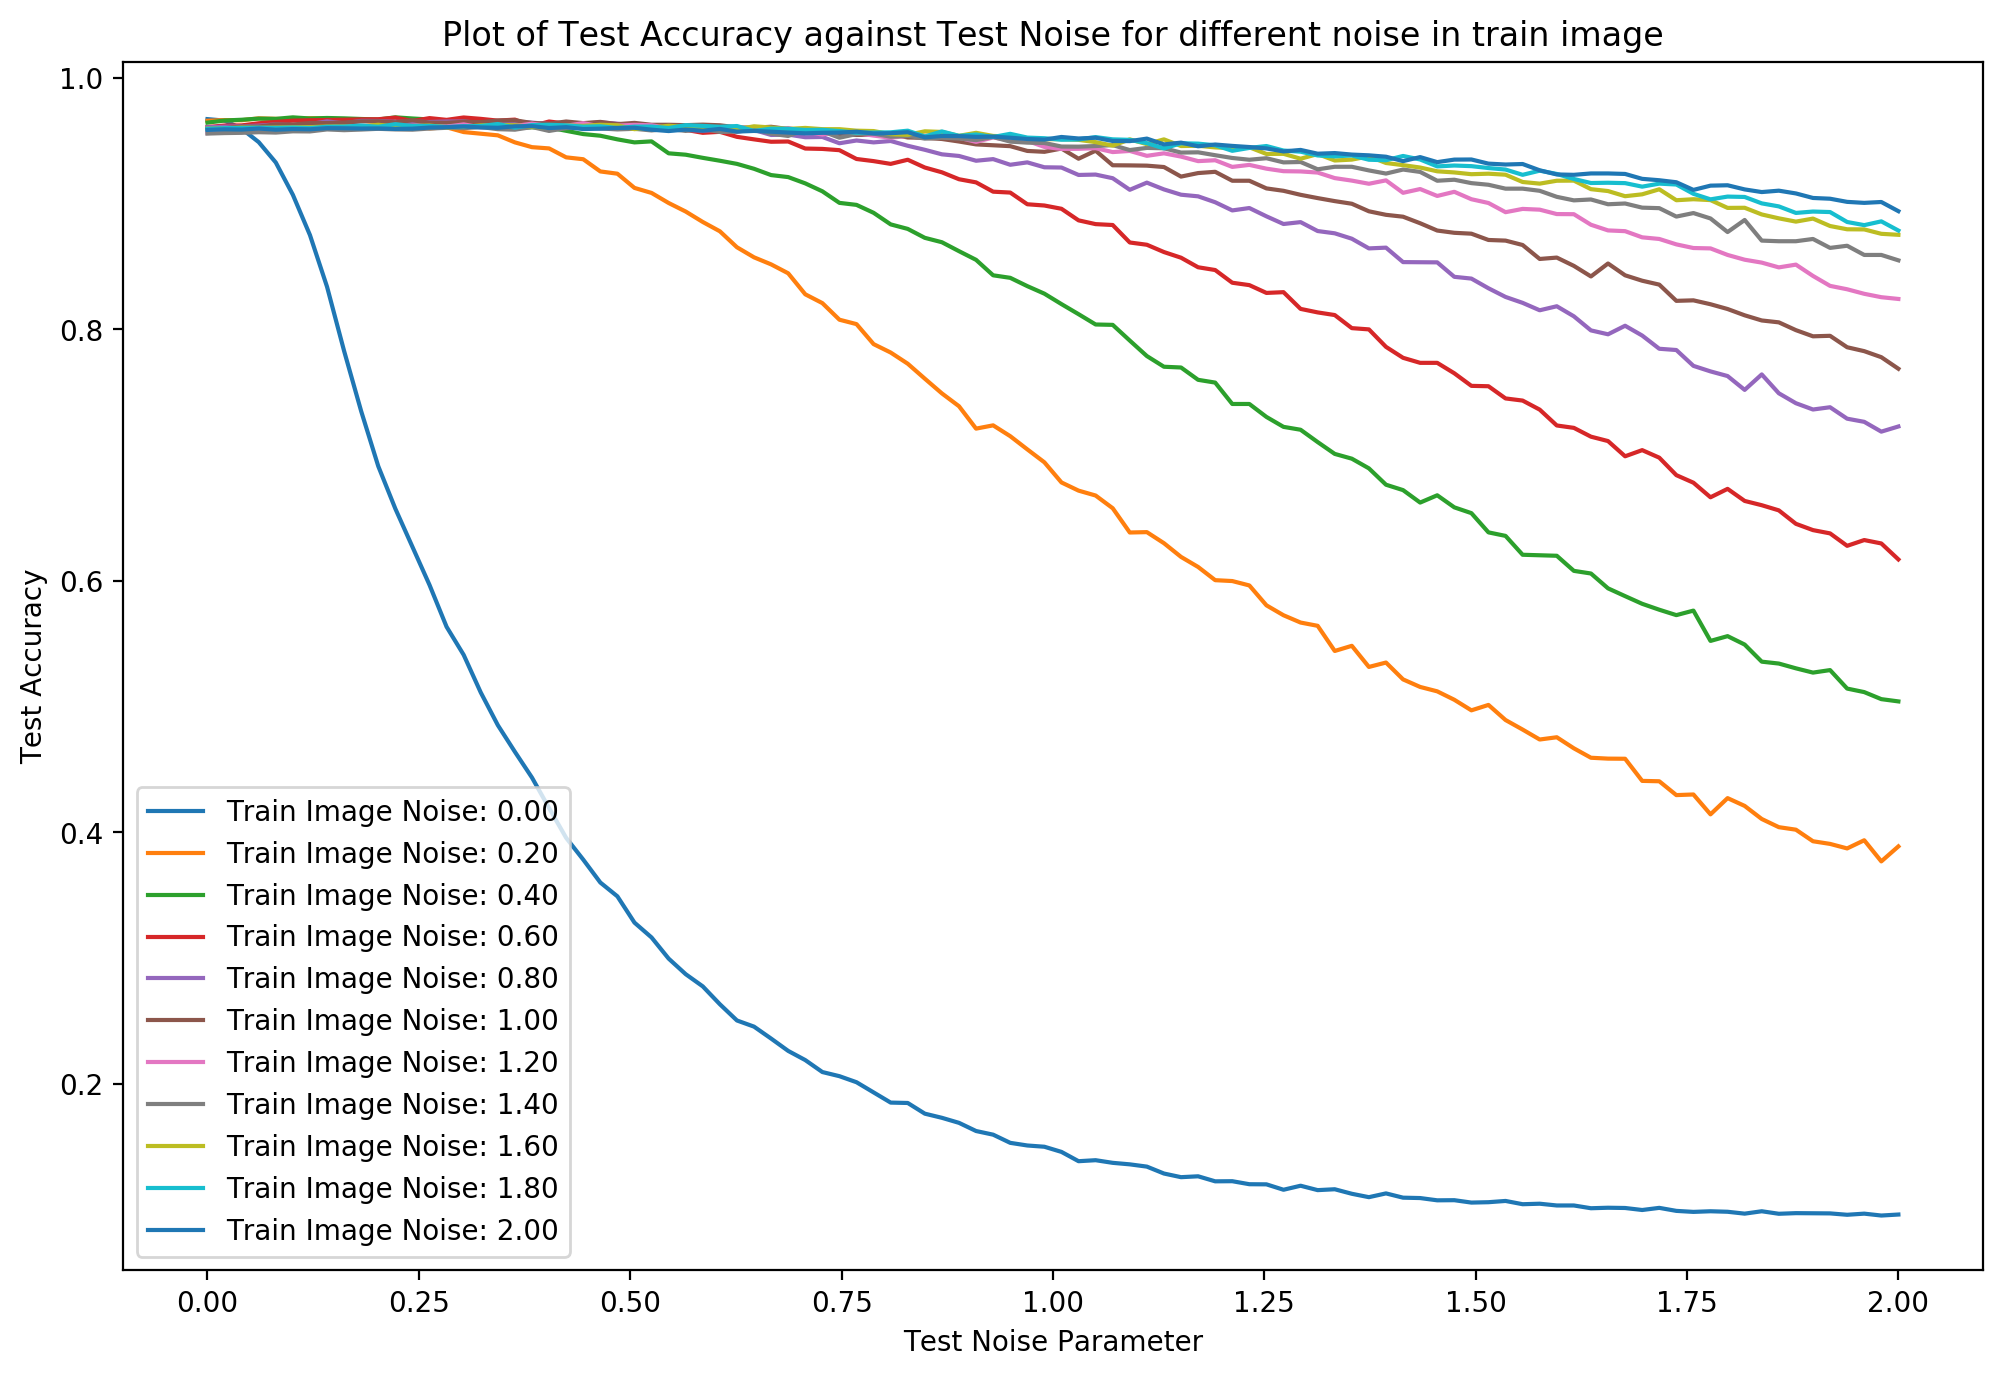

In [12]:
plt.figure()

# Creating array
y_noise_train = np.linspace(0, 2, 11)        # Create an array for y_noise of train images
y_noise = np.linspace(0,2,100)               # Create an array for y_noise of test images

# Loop for plot of different y_noise in train images
for a in y_noise_train:

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    
    # Retrain model using train images with different noise
    train_images_noisy = mnist_noisy(train_images, a)                                        
    history=model.fit(train_images_noisy, train_labels,batch_size=100, epochs=10, verbose=0)
    
    # Creating an empty array for test accuracy
    test_accuracy = np.zeros(len(y_noise))
    
    # Loop for finding different test accuracy for different y_noise in test images
    for i in range (len(y_noise)):
    
        test_images_noisy = mnist_noisy(test_images,y_noise[i])                          # Create test images with noise
        test_loss, test_acc = model.evaluate(test_images_noisy,  test_labels, verbose=0) # Evaluating model
        test_accuracy[i] = test_acc                                                      # Append test accuracy value
   
    # Plot
    plt.plot(y_noise, test_accuracy, label="Train Image Noise: {:.2f}".format(a))            # plot of test accuracy against y_noise for different y_noise in train images
    plt.xlabel("Test Noise Parameter")                                                       # Label x-axes
    plt.ylabel("Test Accuracy")                                                              # Label y-axes
    plt.title("Plot of Test Accuracy against Test Noise for different noise in train image") # Plot title
    plt.legend(loc='best')                                                                   # Show legend
    
    


# Discussion

As seen in plot, with zero noise on the test image it is observed that the model using train images without any noise would be trained to have a higher accuracy than the models using train images with noises.


But as we introduce noise into the test image, testing accuracy of model using train images without any noise of low noise parameter decreases rapidly. This is expected as model using train images without noise perform well for test image without any noise. (Impractical for real life examples). This is an indication of overfitting


For models built using train images with noise, test accuracy does not decreases as rapidly even when compared to test image with increasing noise. (Practical for real life example)

The test images are plotted below with different y_noise.

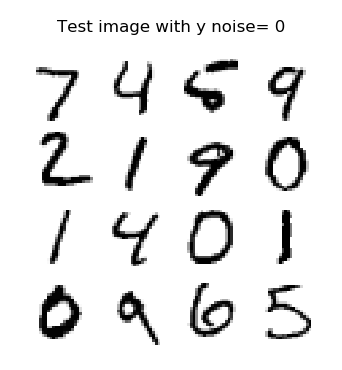

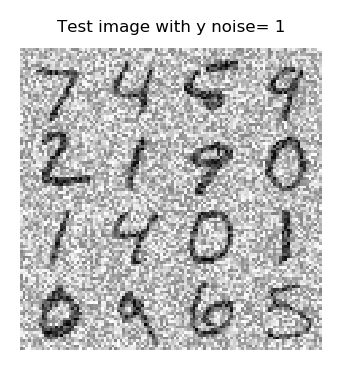

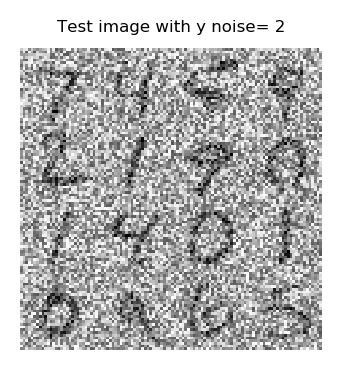

In [13]:
mpl.rcParams['figure.figsize'] = [2.0, 2.0]
def display_image_array(whichImg, y_noise):    
    numcols=int(math.sqrt(len(whichImg)))
    if numcols*numcols < len(whichImg):
        numcols=numcols+1
    BigImage=np.zeros([28*numcols,28*numcols])
    for j in range(len(whichImg)):
        x=(j%numcols)*28
        y=int(j/numcols)*28
        BigImage[x:x+28,y:y+28]=mnist_noisy(test_images, y_noise)[whichImg[j]]
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.axis('off')
    plt.title('Test image with y noise= {:.0f}'.format(y_noise), fontsize=6)
    plt.show()
    
whichImg=range(16)
display_image_array(whichImg, 0)
display_image_array(whichImg, 1)
display_image_array(whichImg, 2)

With y noise = 0, test image is not realistic as there is no noise (perfect).
<br>
With y noise = 1, the test image is more realistic with some noise around but still nothing too crazy.
<br>
With y noise = 2, it is getting harder for human eyes to differentiate the numbers.
<br>
With y noise > 2, it would almost be impossible for human eye to differentiate the numbers and there is no need for model to be able to distinguish the numbers

# Conclusion
Thus, personally I would choose to **retrain** my model with added y noise ranging from 1 to 1.6 after training it without any noise to avoid overfitting but still have a high testing accuracy. This is because the model still have a testing accuracy higher than 80% when the tesing image noise range from 1-2. Also, this is highly dependant on specific application of model.